# Connect Four AI - Project for Foundations of Artificial Intelligence class at Northeaster, Spring 2023.
In this project, we were tasked with creating a Connect Four player algorithm using heuristic search. Our algorithms would then be tested in a class-wide tournament; this was exciting, but did not end up materializing.
Either way, it was a fun project.

#### Utility Code

In [1]:
import numpy as np

# Board is 8x8 numpy array
# 0 = no piece
# 1 = X piece
# 2 = O piece

blank = 0
X = 1
O = 2

symbol = [' ','X','O']

N = 8      

def getEmptyBoard():                            
    return np.zeros((N,N)).astype(int)


ERROR = -1


def isError(B):
    if type(B) == int:
        return B == ERROR
    else:
        return False

# Print out a human-readable version of the board

def printBoard(B,ind=0):
    indent = '\t'*ind
    if isError(B):
        print(indent,"ERROR: Overflow in column.")
        return
    print(indent,'  0 1 2 3 4 5 6 7')
    print(indent,'-------------------')
    for row in range(N):
        print(indent,'|',end='')
        for col in range(N):
            print(' '+ symbol[B[row][col]],end='')
        print(' |')
    print(indent,'-------------------')
    
printBoard(getEmptyBoard())
print()
printBoard(ERROR)

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 -------------------

 ERROR: Overflow in column.


### Connect Four - Logic Implementation

In [ ]:

def illegalMove(m):
    return not(0 <= m <= 7)

def noRoomInColumn(move,board):
    return board[0][move] != blank

def dropPiece(player,move,board):
    if illegalMove(move) or noRoomInColumn(move, board):
        return ERROR
    # find lowest empty cell in the column
    row = 7
    while board[row][move] != blank:
        row -= 1
    
    # drop the piece into the cell
    board[row][move] = player
    
    return board


# tests

# makeExample takes a list of X,O,X,O etc. moves and create a board. 

def makeExample(moves):
    B = getEmptyBoard()
    player = X
    nextPlayer = O
    for m in moves:
        B = dropPiece(player,m,B) 
        if isError(B):               
            return ERROR
        player,nextPlayer = nextPlayer,player
    return B


# Test out of range error

if(dropPiece(X,100,getEmptyBoard())):
    print("Move outside range 0..7!")
else:
    print("Range test did not work. ")    
print()

# Test dropPiece

B = dropPiece(X,3,getEmptyBoard())
B = dropPiece(O,4,B)
B = dropPiece(X,0,B)
B = dropPiece(O,7,B)
B = dropPiece(X,5,B)
B = dropPiece(O,3,B)
B = dropPiece(X,4,B)
B = dropPiece(O,5,B)
B = dropPiece(X,5,B)
printBoard(B)
print()


L2R = list(range(8))
R2L = L2R[::-1]
M = (L2R + R2L) * 4


fullBoard = makeExample(M)
printBoard(fullBoard)
print()


# next one should return error message for any 0 <= m <= 7, since there is no room in any column

m = 5

print("No room in column "+str(m)+":",noRoomInColumn(m,fullBoard),'\n')

printBoard( dropPiece(X,m,fullBoard) )

Move outside range 0..7!

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |           X     |
 |       O X O     |
 | X     X O X   O |
 -------------------

   0 1 2 3 4 5 6 7
 -------------------
 | O X O X O X O X |
 | X O X O X O X O |
 | O X O X O X O X |
 | X O X O X O X O |
 | O X O X O X O X |
 | X O X O X O X O |
 | O X O X O X O X |
 | X O X O X O X O |
 -------------------

No room in column 5: True 

 ERROR: Overflow in column.


### checkWin

Determines whether one of the players hasa winning configuration.

In [3]:
# player = 1 (X) or 2 (O)
# checkWin(X,board) returns X=1 if X wins,  else 0
# checkWin(O,board) returns O=2 if O wins,  else 0 

# No need to check if X and O both have winning sequences, since this will be used after each move.

def checkWin(player, board):
    # Check horizontal sequences
    for row in range(8):
        for col in range(5):
            if all(board[row][col+i] == player for i in range(4)):
                return player
    
    # Check vertical sequences
    for row in range(5):
        for col in range(8):
            if all(board[row+i][col] == player for i in range(4)):
                return player
    
    # Check diagonal (down-right) sequences
    for row in range(5):
        for col in range(5):
            if all(board[row+i][col+i] == player for i in range(4)):
                return player
    
    # Check diagonal (up-right) sequences
    for row in range(3, 8):
        for col in range(5):
            if all(board[row-i][col+i] == player for i in range(4)):
                return player
    
    # If no winning sequence found, return 0
    return 0



In [4]:
# tests

NoWins = [
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 1, 0, 0, 2, 0, 0, 0],[0, 2, 0, 0, 1, 2, 1, 0],[0, 1, 0, 0, 2, 2, 1, 0],[1, 2, 0, 0, 2, 1, 2, 1],[2, 1, 2, 1, 2, 2, 1, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 1],[0, 1, 2, 0, 1, 0, 1, 1],[0, 2, 1, 0, 2, 0, 2, 2],[2, 1, 2, 0, 2, 0, 1, 2],[2, 1, 1, 2, 2, 1, 1, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 0, 2, 0, 1],[0, 0, 0, 2, 0, 1, 2, 1],[0, 0, 2, 1, 0, 1, 2, 2],[0, 1, 1, 2, 0, 2, 1, 1],[2, 2, 1, 2, 0, 1, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 2, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0],[0, 2, 2, 0, 0, 0, 0, 2],[0, 2, 1, 0, 2, 1, 1, 2],[0, 2, 1, 0, 2, 1, 1, 2],[1, 1, 2, 1, 1, 2, 1, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 0, 1, 0, 0, 0],[1, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 1, 0, 1, 0],[2, 0, 1, 0, 1, 0, 1, 0],[1, 0, 2, 0, 2, 1, 2, 2],[1, 0, 2, 2, 1, 2, 2, 1]])]

XWins = [
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 0],[2, 0, 2, 1, 2, 2, 0, 0],[1, 1, 2, 1, 1, 1, 2, 2],[1, 1, 1, 1, 2, 1, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 0],[2, 0, 2, 1, 2, 2, 0, 0],[1, 1, 2, 1, 1, 1, 2, 2],[2, 1, 1, 2, 1, 1, 1, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 0],[2, 0, 2, 1, 2, 2, 0, 0],[1, 1, 2, 1, 1, 1, 2, 2],[2, 2, 1, 1, 1, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 0],[2, 0, 2, 1, 2, 2, 0, 0],[1, 2, 1, 1, 1, 1, 2, 2],[2, 2, 2, 1, 1, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[2, 0, 0, 0, 1, 2, 0, 1],[2, 0, 2, 1, 2, 2, 0, 1],[1, 2, 2, 1, 1, 1, 2, 1],[2, 2, 2, 1, 1, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 0, 1, 0, 0, 0],[1, 0, 0, 0, 1, 2, 0, 0],[1, 0, 2, 1, 2, 2, 0, 1],[1, 2, 2, 1, 1, 1, 2, 1],[2, 2, 2, 1, 1, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[1, 0, 0, 0, 1, 2, 0, 0],[1, 0, 2, 1, 1, 2, 0, 1],[1, 2, 2, 1, 1, 1, 2, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 0, 1, 2, 0, 0],[1, 0, 2, 1, 1, 1, 0, 1],[1, 2, 2, 1, 1, 1, 1, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 1, 1, 2, 0, 0],[1, 0, 1, 1, 1, 2, 2, 1],[1, 1, 2, 1, 1, 1, 1, 1],[1, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 1, 0, 0],[1, 0, 0, 1, 1, 2, 0, 0],[1, 0, 1, 1, 1, 2, 2, 1],[1, 1, 1, 1, 1, 1, 1, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0],[1, 0, 2, 1, 1, 2, 0, 0],[1, 0, 1, 1, 1, 2, 2, 1],[1, 2, 1, 2, 1, 1, 1, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 2, 1, 1, 2, 0, 0],[1, 1, 1, 1, 1, 2, 2, 1],[1, 2, 1, 2, 1, 1, 1, 1],[2, 2, 2, 1, 2, 1, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 1],[2, 0, 2, 1, 1, 2, 1, 2],[1, 1, 1, 1, 1, 1, 2, 1],[1, 2, 1, 2, 1, 1, 1, 1],[2, 1, 1, 2, 2, 1, 2, 1]])]

OWins = [
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 0],[1, 0, 1, 2, 1, 1, 0, 0],[2, 2, 1, 2, 2, 2, 1, 1],[2, 2, 2, 2, 1, 2, 2, 1]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 0],[1, 0, 1, 2, 1, 1, 0, 0],[2, 2, 1, 2, 2, 2, 1, 1],[1, 2, 2, 1, 2, 2, 2, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 0],[1, 0, 1, 2, 1, 1, 0, 0],[2, 2, 1, 2, 2, 2, 1, 1],[1, 1, 2, 2, 2, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 0],[1, 0, 1, 2, 1, 1, 0, 0],[2, 1, 2, 2, 2, 2, 1, 1],[1, 1, 1, 2, 2, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[1, 0, 0, 0, 2, 1, 0, 2],[1, 0, 1, 2, 1, 1, 0, 2],[2, 1, 1, 2, 2, 2, 1, 2],[1, 1, 1, 2, 2, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 0, 2, 0, 0, 0],[2, 0, 0, 0, 2, 1, 0, 0],[2, 0, 1, 2, 1, 1, 0, 2],[2, 1, 1, 2, 2, 2, 1, 2],[1, 1, 1, 2, 2, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 2, 0, 0, 0],[2, 0, 0, 0, 2, 1, 0, 0],[2, 0, 1, 2, 2, 1, 0, 2],[2, 1, 1, 2, 2, 2, 1, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 0, 2, 1, 0, 0],[2, 0, 1, 2, 2, 2, 0, 2],[2, 1, 1, 2, 2, 2, 2, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 0, 2, 2, 1, 0, 0],[2, 0, 2, 2, 2, 1, 1, 2],[2, 2, 1, 2, 2, 2, 2, 2],[2, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 2, 0, 0],[2, 0, 0, 2, 2, 1, 0, 0],[2, 0, 2, 2, 2, 1, 1, 2],[2, 2, 2, 2, 2, 2, 2, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 2, 0, 0, 0, 0, 0],[2, 0, 1, 2, 2, 1, 0, 0],[2, 0, 2, 2, 2, 1, 1, 2],[2, 1, 2, 1, 2, 2, 2, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[2, 0, 1, 2, 2, 1, 0, 0],[2, 2, 2, 2, 2, 1, 1, 2],[2, 1, 2, 1, 2, 2, 2, 2],[1, 1, 1, 2, 1, 2, 1, 2]]),
 np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 2],[1, 0, 1, 2, 2, 1, 2, 1],[2, 2, 2, 2, 2, 2, 1, 2],[2, 1, 2, 1, 2, 2, 2, 2],[1, 2, 2, 1, 1, 2, 1, 2]])]

In [5]:
for b in XWins:
    print(checkWin(X,b),end='')       # 1111111111111
print() 
for b in OWins:
    print(checkWin(O,b),end='')       # 2222222222222
print()
for b in NoWins:
    print(checkWin(X,b),end='')        # 00000
print()

1111111111111
2222222222222
00000


### Play against random player

In [6]:
### Interactive version

from numpy.random import randint

def randomPlayer(board):
    m = randint(8)
    while noRoomInColumn(m,board):                # no move in this column, try again
        m = randint(8)                            
    return m

def ConnectFour():
    game = True
    B = getEmptyBoard()
    while game:
        inp = input('X\'s move: ')
        if inp == "quit":
            game = False
            break
        move = int(inp)  # convert string to int

        if illegalMove(move):
            print("Illegal move: not in range 0..7.")
            continue

        print("")

        B = dropPiece(X,move,B)
        printBoard(B)
        print("")

        if checkWin(X, B) == X:
            print("Win for X!")
            game = False
            break

        randMove = randomPlayer(B)
    #     randMove = 4  
        print("O's move:", randMove, "\n")

        B = dropPiece(O, randMove, B)
        printBoard(B)
        print("")

        if checkWin(O, B) == O:
            print("Win for O!")
            game = False
            break

ConnectFour()

X's move: 4

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |         X       |
 -------------------

O's move: 3 

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |       O X       |
 -------------------

X's move: 4

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |         X       |
 |       O X       |
 -------------------

O's move: 2 

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |         X       |
 |     O O X       |
 -------------------

X's move: QUIT


ValueError: invalid literal for int() with base 10: 'QUIT'

## Connect-four AI
We will now create an automated player.

The first task is to write the evaluation (heuristic) function which tells us how good a board position is for us. 

In [7]:
import sys

OWIN = sys.maxsize
XWIN = -OWIN

MAX = sys.maxsize
MIN = -MAX

# THREE_SCORE = 50                 
# TWO_SCORE = 10                  


# Return evaluation of the board from O's point of view

def eval(board, two_score=10, three_score=50, maximizing_player=O):
    THREE_SCORE = three_score
    TWO_SCORE = two_score

    o_score, x_score = 0, 0

    def score_seq(seq, maximizing_player):
        nonlocal o_score, x_score
        x_count, o_count, blank_count = seq.count(X), seq.count(O), seq.count(blank)

        if o_count == 4:
            return (MAX, (0, 0, 0, 0)) if maximizing_player == O else (MIN, (0, 0, 0, 0))
        elif x_count == 4:
            return (MAX, (0, 0, 0, 0)) if maximizing_player == X else (MIN, (0, 0, 0, 0))

        elif o_count == 3 and blank_count == 1:
            o_score += THREE_SCORE
        elif x_count == 3 and blank_count == 1:
            x_score -= THREE_SCORE
        elif o_count == 2 and blank_count == 2:
            o_score += TWO_SCORE
        elif x_count == 2 and blank_count == 2:
            x_score -= TWO_SCORE
        return None

    check_directions = [list(range(4)), list(range(4)), list(range(4)), list(range(4))]

    for row in range(8):
        for col in range(5):
            seq = [board[row][col + i] for i in range(4)]
            result = score_seq(seq, maximizing_player)
            if result is not None:
                return result

    for row in range(5):
        for col in range(8):
            seq = [board[row + i][col] for i in range(4)]
            result = score_seq(seq, maximizing_player)
            if result is not None:
                return result

    for row in range(5):
        for col in range(5):
            seq = [board[row + i][col + i] for i in range(4)]
            result = score_seq(seq, maximizing_player)
            if result is not None:
                return result

    for row in range(3, 8):
        for col in range(5):
            seq = [board[row - i][col + i] for i in range(4)]
            result = score_seq(seq, maximizing_player)
            if result is not None:
                return result
            
    o_two_count = o_score // two_score
    o_three_count = o_score // three_score
    x_two_count = (-x_score) // two_score
    x_three_count = (-x_score) // three_score
    
    # for quiescence search
    
    return ((o_score + x_score), (o_two_count, o_three_count, x_two_count, x_three_count)) if maximizing_player == O else (-(o_score + x_score), (o_two_count, o_three_count, x_two_count, x_three_count))


In [8]:
# tests with THREE_SCORE = 50 and TWO_SCORE = 10

def testEval(board):
    printBoard(board)
    print()
    print('eval(B) =',eval(board))

testEval(makeExample([3,0,4,2,5,2,4])); print()                               # eval(B) = -80 
testEval(makeExample([6, 5, 1])); print()                                     # eval(B) = 0
testEval(makeExample([0, 2, 6, 1, 2, 1])); print()                            # eval(B) = 20 
testEval(makeExample([2, 6, 6, 1, 4, 0, 3, 3, 3, 2])); print()                # eval(B) = -20 
testEval(makeExample([4, 3, 2, 6, 5, 3, 7, 5, 4, 4, 1, 2])); print()          # eval(B) = 90 
testEval(makeExample([3, 5, 6, 2, 2, 5, 7, 3, 6, 6, 5, 4, 6, 4, 4])); print() # eval(B) = -10 
testEval(makeExample([5, 1, 7, 0, 3, 6, 1, 4, 2, 2, 5, 0, 4, 5, 4, 2, 
                      3, 6, 6, 1, 1, 2, 2, 7, 6, 7, 2, 0, 0, 5, 4, 7, 
                      7, 4, 2])); print()                                     # eval(B) = -30 
r1 = [2, 1]*4; r2 = [1, 2]*4
testEval(np.array([r1,r2,r2,r1,r2,r2,r1,r2])); print()                        # eval(B) = 0 
testEval(makeExample([7, 1, 1, 5, 6, 1, 7, 6, 1, 3, 1, 2, 6, 0, 6])); print() # eval(B) = sys.maxsize 
testEval(makeExample([7, 7, 7, 4, 0, 0, 7, 6, 7, 2, 6, 6, 7, 6, 1])); print() # eval(B) = -sys.maxsize 

print()

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |     O   X       |
 | O   O X X X     |
 -------------------

eval(B) = (-80, (1, 0, 9, 1))

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |   X       O X   |
 -------------------

eval(B) = (0, (0, 0, 0, 0))

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |   O X           |
 | X O O       X   |
 -------------------

eval(B) = (20, (2, 0, 0, 0))

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |       X         |
 |     O O     X   |
 | O O X X X   O   |
 -----------

### Part B

Now you must implement the `minMax` algorithm as described in lecture, with the following changes and additions:

- `minMax` as shown in the template must take the following parameters:

  - board -- the current board being evaluated
  - player -- either 1 (X) or 2 (O); the O player is the maximizing player (board is a max node) and X 
    is the minimizing player (board is a min node)
  - depth -- level of this call: the first call in `player` starts at level 0, and you should increase
    the depth by 1 for each recursive call to `minMax`
  - alpha,beta -- cutoff bounds as described in lecture. 

- `minMax` must return a pair `(score,move)` giving the min-max score calculated for the `board` and 
  the move that corresponds to this score. The move will only be used at the top level by `player`, and
  will be ignored by recursive calls to `minMax`. (However, it might be useful for tracing execution.)
  By this arrangement, you will not need a separate "chooseMove" function as shown in the lecture slides,
  and can simply use the first call to `minMax` to generate the move. 

- You must count the number of nodes examined (or, following the pseudo-code below, the number of calls to `minMax`); you may examine at most 10,000 nodes in any single call to `player`; as shown in the pseudo-code, 
  a new call to `minMax` above this limit should immediately return `(0,None)`.
  
- It is *strongly recommended* that you do *not* make multiple copies of the board (e.g., when creating child
  nodes); instead, use the "recursive backtracking" trick of making a move on the board before each
  recursive call, then *undoing* the move before the next call:
  
           for move in range(8):
               row = row that this move would be placed in
               board[row][move] =  player that is making this move           # make the move
               val = minMax(board, <other player>,  ....)
               board[row][move] = 0                                          # undo the move
                              

In [9]:
# Code for Part B

maxNodeLimit = 10000           # You can not change this
# maxDepth = 3                   # You will want to change this and experiment with different values
countNodes = 0

depthSoFar = 0

MAX = sys.maxsize
MIN = -sys.maxsize


from numpy.random import randint
import time


def randomPlayer(board):
    m = randint(8)
    while noRoomInColumn(m,board):                # no move in this column, try again
        m = randint(8)                            
    return m

def randomMove(board):
    m = randint(8)
    while noRoomInColumn(m,board):                # no move in this column, try again
        m = randint(8)
    return m

def get_row_for_move(board, column):
    for row in reversed(range(len(board))):
        if board[row][column] == 0:
            return row
    return None

transposition_table = {}

# I was initially trying to implement quiescence search but it was messing up my minMax,
# so I took it out, but I don't have time to change the inputs because I think it'll
# mess up my code (it's not harming anyone)
def player(board, maxDepth=3, current_player=O, maximizing_player=O, two_score=10, three_score=50,
           iterative=True, transposition=True, transposition_table=None, quiescence=True,
           maxQuiescenceExtensions=3):

    if transposition and transposition_table is None:
        transposition_table = {}

    global countNodes
    countNodes = 0

    best_move = None
    best_score = None
    
    # I had to implement iterative deepening here because it was too complicated
    # to implement it into the minMax directly

    if iterative:
        for d in range(1, maxDepth + 1):
            (score, move) = minMax(board, current_player, 0, -sys.maxsize, sys.maxsize, maxDepth=d,
                                   maximizing_player=maximizing_player, two_score=two_score,
                                   three_score=three_score, transposition_table=transposition_table,
                                   quiescence=quiescence, maxQuiescenceExtensions=maxQuiescenceExtensions)
            
            if score in [sys.maxsize, -sys.maxsize]:
                print("Nodes used for move: ", countNodes)
                return move
            
            if best_score is None or (current_player == maximizing_player and score > best_score) or (current_player != maximizing_player and score < best_score):
                best_score = score
                best_move = move
            
            if countNodes >= maxNodeLimit:
                print("Node limit reached in iterative deepening")
                break
    else:
        (_, best_move) = minMax(board, current_player, 0, -sys.maxsize, sys.maxsize, maxDepth,
                                maximizing_player=maximizing_player, two_score=two_score,
                                three_score=three_score, transposition_table=transposition_table,
                                quiescence=quiescence, maxQuiescenceExtensions=maxQuiescenceExtensions)
    print("Nodes used for move: ", countNodes)
    return best_move


# remnant of my attempt to implement quiescence search but not used
def is_quiet(board, player, three_score=50):
    _, (o_two_count, o_three_count, x_two_count, x_three_count) = eval(board, maximizing_player=player, three_score=three_score)
    
    if player == O:
        return o_three_count == 0 and x_three_count == 0
    else:
        return o_two_count == 0 and x_two_count == 0


    
# aside from alpha/beta pruning, I implemented a transposition table, which saves board
# states for later use and returns their scores if encountered again.
# if they were not explored to the current max depth, they are explored further.
# I also added iterative deepening as I mentioned above
def minMax(board, player, depth, alpha, beta, maxDepth=3, maximizing_player=O, two_score=10,
           three_score=50, transposition_table=None, transposition=True, maxNodeLimit=maxNodeLimit,
           quiescence=True, quiescenceExtensions=0, maxQuiescenceExtensions=3):
    
    # I pass the maximizing player because I was trying to make the algorithm play itself

    global countNodes
    countNodes += 1
    
    if countNodes >= maxNodeLimit:
        return (0, None)

    if transposition:
        if transposition_table is None:
            transposition_table = {}
        
        # check if board is in transposition table
        board_tuple = tuple(tuple(row) for row in board)
        if (board_tuple, player, depth) in transposition_table:
            stored_depth, stored_value = transposition_table[(board_tuple, player, depth)]
            if stored_depth >= maxDepth - depth:
                return stored_value
            
    score = eval(board, two_score, three_score, maximizing_player=maximizing_player)[0]
    if depth == maxDepth or score in [MIN, MAX]:
        return (score, None)

    best_move = None
    best_score = -sys.maxsize if player == maximizing_player else sys.maxsize
    
    # move ordering- prioritize center moves.
    center_prioritized = [3, 4, 2, 5, 1, 6, 0, 7]

    for move in center_prioritized:
        row = get_row_for_move(board, move)
        if row is not None:
            board[row][move] = player
            (child_score, _) = minMax(board, 3 - player, depth + 1, alpha, beta, maxDepth, maximizing_player, two_score, three_score, transposition_table, maxNodeLimit,
                                      quiescence=quiescence, quiescenceExtensions=quiescenceExtensions, maxQuiescenceExtensions=maxQuiescenceExtensions)
            board[row][move] = 0  # undo the move

            if player == maximizing_player:
                if child_score > best_score:
                    best_score = child_score
                    best_move = move
                alpha = max(alpha, best_score)
            else:
                if child_score < best_score:
                    best_score = child_score
                    best_move = move
                beta = min(beta, best_score)

            if beta <= alpha:
                break

    if best_move is None:
        best_move = randomMove(board)

    if transposition:
        transposition_table[(board_tuple, player, depth)] = (maxDepth - depth, (best_score, best_move))

    return (best_score, best_move)



In [10]:
# Some simple tests:  better testing can be done by running the interactive version from Part C
# Your results may vary slight from what is shown here, but should be similar


# minor alterations here but the tests are the same

maxDepth = 1          # minMax will call eval on all children of root node
countNodes = 0
transposition_table = {}

# def player(board, maxDepth=3, current_player=O, maximizing_player=O, two_score=10, three_score=50,
#            iterative=True, transposition=True, transposition_table=None, quiescence=True,
#            maxQuiescenceExtensions=3):
    
depthSoFar = 0

board1 = makeExample([3,4,2,5,2,6,2,3])
print()
printBoard(board1)
print("minMax:", minMax(board1,O,0,-sys.maxsize,sys.maxsize, maximizing_player=O, maxDepth=maxDepth) )  # (9223372036854775807, 7)

# print(player(board1, maxDepth=maxDepth))

countNodes = 0
transposition_table = {}

board2 = makeExample([3,4,2,5,2,0,2])
print()
printBoard(board2)
print("minMax:", minMax(board2,O,0,-sys.maxsize,sys.maxsize, maxDepth=maxDepth) )  # (10, 2)
# print(player(board2, maxDepth=maxDepth))

depthSoFar = 0
maxDepth = 2

countNodes = 0
transposition_table = {}

board2 = makeExample([3,4,2,5,2,0,2])
print()
printBoard(board2)
print("minMax:", minMax(board2,O,0,-sys.maxsize,sys.maxsize, maxDepth=maxDepth, quiescence=False) )  # (-50, 2)
# print(player(board2, maxDepth=maxDepth))

depthSoFar = 0
countNodes = 0
transposition_table = {}

board3 = makeExample([3,0,4,4,3,4,5])
print()
printBoard(board3)
print("minMax:", minMax(board3,O,0,-sys.maxsize,sys.maxsize, maxDepth=maxDepth, quiescence=False) )  # (-9223372036854775807, 7) every move loses!
depthSoFar = 0

# print(player(board3, maxDepth=maxDepth))



   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |     X           |
 |     X O         |
 |     X X O O O   |
 -------------------
minMax: (9223372036854775807, 7)

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |     X           |
 |     X           |
 | O   X X O O     |
 -------------------
minMax: (10, 2)

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |     X           |
 |     X           |
 | O   X X O O     |
 -------------------
minMax: (-50, 2)

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |         O       |
 |       X O       |
 | O     X X X     |
 -------------------
minMax: (-9223

### Playing with our Player

### Interactive version


In [11]:
import time
from numpy.random import randint

game = True
B = getEmptyBoard()
while game:
    inp = input('X\'s move: ')
    if inp == "quit":
        game = False
        break
    move = int(inp)  # convert string to int
    
    if illegalMove(move):
        print("Illegal move: not in range 0..7.")
        continue
    
    print("")
    
    B = dropPiece(X,move,B)
    printBoard(B)
    print("")
    
    if checkWin(X, B) == X:
        print("Win for X!")
        game = False
        break
    
    t_start = time.perf_counter()
    move = player(B, maxDepth=6, iterative=True)
    t_end = time.perf_counter()
    print("Time elapsed:", np.around(t_end-t_start,2), "secs.")
#     randMove = 4  
    print("O's move:", move, "\n")

    B = dropPiece(O, move, B)
    printBoard(B)
    print("")
    
    if checkWin(O, B) == O:
        print("Win for O!")
        game = False
        break

X's move: 5

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |           X     |
 -------------------

Nodes used for move:  5764
Time elapsed: 1.9 secs.
O's move: 3 

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |       O   X     |
 -------------------

X's move: quit


## Connect4 Contest

"For this problem, you will provide a complete listing of all necessary code in a single
code cell, so that we can copy it into a master notebook to run a contest among all
the submissions, plus Prof Snyder's implementation, and the random player."

"You may examine at most 10,000 nodes, and you may take no longer than 30 seconds to make
a move (on my power Mac, which is quite fast, so this is just to make sure that you don't
do something completely crazy that takes absurd amounts of time).  There is no other restriction
on the depth, just that you may call `minMax` at most 10,000 times."

In [12]:
# Your name:  Alexandre Amiredjibi

# your code here
def illegalMove(m):
    return not(0 <= m <= 7)

def noRoomInColumn(move,board):
    return board[0][move] != blank

def dropPiece(player,move,board):
    if illegalMove(move) or noRoomInColumn(move, board):
        return ERROR
    # find lowest empty cell in the column
    row = 7
    while board[row][move] != blank:
        row -= 1
    
    # drop the piece into the cell
    board[row][move] = player
    
    return board


def checkWin(player, board):
    # Check horizontal sequences
    for row in range(8):
        for col in range(5):
            if all(board[row][col+i] == player for i in range(4)):
                return player
    
    # Check vertical sequences
    for row in range(5):
        for col in range(8):
            if all(board[row+i][col] == player for i in range(4)):
                return player
    
    # Check diagonal (down-right) sequences
    for row in range(5):
        for col in range(5):
            if all(board[row+i][col+i] == player for i in range(4)):
                return player
    
    # Check diagonal (up-right) sequences
    for row in range(3, 8):
        for col in range(5):
            if all(board[row-i][col+i] == player for i in range(4)):
                return player
    
    # If no winning sequence found, return 0
    return 0


import sys

OWIN = sys.maxsize
XWIN = -OWIN

MAX = sys.maxsize
MIN = -MAX

# THREE_SCORE = 50                  # just for testing, you may want to experiment with different values
# TWO_SCORE = 10                    # for these two parameters


# Return evaluation of the board from O's point of view

def eval(board, two_score=10, three_score=50, maximizing_player=O):
    THREE_SCORE = three_score
    TWO_SCORE = two_score

    o_score, x_score = 0, 0

    def score_seq(seq, maximizing_player):
        nonlocal o_score, x_score
        x_count, o_count, blank_count = seq.count(X), seq.count(O), seq.count(blank)

        if o_count == 4:
            return (MAX, (0, 0, 0, 0)) if maximizing_player == O else (MIN, (0, 0, 0, 0))
        elif x_count == 4:
            return (MAX, (0, 0, 0, 0)) if maximizing_player == X else (MIN, (0, 0, 0, 0))

        elif o_count == 3 and blank_count == 1:
            o_score += THREE_SCORE
        elif x_count == 3 and blank_count == 1:
            x_score -= THREE_SCORE
        elif o_count == 2 and blank_count == 2:
            o_score += TWO_SCORE
        elif x_count == 2 and blank_count == 2:
            x_score -= TWO_SCORE
        return None

    check_directions = [list(range(4)), list(range(4)), list(range(4)), list(range(4))]

    for row in range(8):
        for col in range(5):
            seq = [board[row][col + i] for i in range(4)]
            result = score_seq(seq, maximizing_player)
            if result is not None:
                return result

    for row in range(5):
        for col in range(8):
            seq = [board[row + i][col] for i in range(4)]
            result = score_seq(seq, maximizing_player)
            if result is not None:
                return result

    for row in range(5):
        for col in range(5):
            seq = [board[row + i][col + i] for i in range(4)]
            result = score_seq(seq, maximizing_player)
            if result is not None:
                return result

    for row in range(3, 8):
        for col in range(5):
            seq = [board[row - i][col + i] for i in range(4)]
            result = score_seq(seq, maximizing_player)
            if result is not None:
                return result
            
    o_two_count = o_score // two_score
    o_three_count = o_score // three_score
    x_two_count = (-x_score) // two_score
    x_three_count = (-x_score) // three_score
    
    # for quiescence search
    
    return ((o_score + x_score), (o_two_count, o_three_count, x_two_count, x_three_count)) if maximizing_player == O else (-(o_score + x_score), (o_two_count, o_three_count, x_two_count, x_three_count))


maxNodeLimit = 10000           # You can not change this
# maxDepth = 3                   # You will want to change this and experiment with different values
countNodes = 0

depthSoFar = 0

MAX = sys.maxsize
MIN = -sys.maxsize


from numpy.random import randint
import time


def randomPlayer(board):
    m = randint(8)
    while noRoomInColumn(m,board):                # no move in this column, try again
        m = randint(8)                            
    return m

def randomMove(board):
    m = randint(8)
    while noRoomInColumn(m,board):                # no move in this column, try again
        m = randint(8)
    return m

# i'm not sure why I have two of those

def get_row_for_move(board, column):
    for row in reversed(range(len(board))):
        if board[row][column] == 0:
            return row
    return None

transposition_table = {}

# I was initially trying to implement quiescence search but it was messing up my minMax,
# so I took it out, but I don't have time to change the inputs because I think it'll
# mess up my code (it's not harming anyone)
def player(board, maxDepth=3, current_player=O, maximizing_player=O, two_score=10, three_score=50,
           iterative=True, transposition=True, transposition_table=None, quiescence=True,
           maxQuiescenceExtensions=3):

    if transposition and transposition_table is None:
        transposition_table = {}

    global countNodes
    countNodes = 0

    best_move = None
    best_score = None
    
    # I had to implement iterative deepening here because it was too complicated
    # to implement it into the minMax directly

    if iterative:
        for d in range(1, maxDepth + 1):
            (score, move) = minMax(board, current_player, 0, -sys.maxsize, sys.maxsize, maxDepth=d,
                                   maximizing_player=maximizing_player, two_score=two_score,
                                   three_score=three_score, transposition_table=transposition_table,
                                   quiescence=quiescence, maxQuiescenceExtensions=maxQuiescenceExtensions)
            
            if score in [sys.maxsize, -sys.maxsize]:
                print("Nodes used for move: ", countNodes)
                return move
            
            if best_score is None or (current_player == maximizing_player and score > best_score) or (current_player != maximizing_player and score < best_score):
                best_score = score
                best_move = move
            
            if countNodes >= maxNodeLimit:
                print("Node limit reached in iterative deepening")
                break
    else:
        (_, best_move) = minMax(board, current_player, 0, -sys.maxsize, sys.maxsize, maxDepth,
                                maximizing_player=maximizing_player, two_score=two_score,
                                three_score=three_score, transposition_table=transposition_table,
                                quiescence=quiescence, maxQuiescenceExtensions=maxQuiescenceExtensions)
    print("Nodes used for move: ", countNodes)
    return best_move


    
# aside from alpha/beta pruning, I implemented a transposition table, which saves board
# states for later use and returns their scores if encountered again.
# if they were not explored to the current max depth, they are explored further.
# I also added iterative deepening as I mentioned above
def minMax(board, player, depth, alpha, beta, maxDepth=3, maximizing_player=O, two_score=10,
           three_score=50, transposition_table=None, transposition=True, maxNodeLimit=maxNodeLimit,
           quiescence=True, quiescenceExtensions=0, maxQuiescenceExtensions=3):
    
    # I pass the maximizing player because I was trying to make the algorithm play itself

    global countNodes
    if countNodes >= maxNodeLimit:
        return (0, None)
    countNodes += 1

    if transposition:
        if transposition_table is None:
            transposition_table = {}
        
        # check if board is in transposition table
        board_tuple = tuple(tuple(row) for row in board)
        if (board_tuple, player, depth) in transposition_table:
            stored_depth, stored_value = transposition_table[(board_tuple, player, depth)]
            if stored_depth >= maxDepth - depth:
                return stored_value
            
    score = eval(board, two_score, three_score, maximizing_player=maximizing_player)[0]
    if depth == maxDepth or score in [MIN, MAX]:
        return (score, None)

    best_move = None
    best_score = -sys.maxsize if player == maximizing_player else sys.maxsize
    
    # move ordering- prioritize center moves.
    center_prioritized = [3, 4, 2, 5, 1, 6, 0, 7]

    for move in center_prioritized:
        row = get_row_for_move(board, move)
        if row is not None:
            board[row][move] = player
            (child_score, _) = minMax(board, 3 - player, depth + 1, alpha, beta, maxDepth, maximizing_player, two_score, three_score, transposition_table, maxNodeLimit,
                                      quiescence=quiescence, quiescenceExtensions=quiescenceExtensions, maxQuiescenceExtensions=maxQuiescenceExtensions)
            board[row][move] = 0  # undo the move

            if player == maximizing_player:
                if child_score > best_score:
                    best_score = child_score
                    best_move = move
                alpha = max(alpha, best_score)
            else:
                if child_score < best_score:
                    best_score = child_score
                    best_move = move
                beta = min(beta, best_score)

            if beta <= alpha:
                break

    if best_move is None:
        best_move = randomMove(board)

    if transposition:
        transposition_table[(board_tuple, player, depth)] = (maxDepth - depth, (best_score, best_move))

    return (best_score, best_move)


import time
from numpy.random import randint

game = True
B = getEmptyBoard()
while game:
    inp = input('X\'s move: ')
    if inp == "quit":
        game = False
        break
    move = int(inp)  # convert string to int
    
    if illegalMove(move):
        print("Illegal move: not in range 0..7.")
        continue
    
    print("")
    
    B = dropPiece(X,move,B)
    printBoard(B)
    print("")
    
    if checkWin(X, B) == X:
        print("Win for X!")
        game = False
        break
    
    t_start = time.perf_counter()
    move = player(B, maxDepth=10, iterative=True)
    t_end = time.perf_counter()
    print("Time elapsed:", np.around(t_end-t_start,2), "secs.")
#     randMove = 4  
    print("O's move:", move, "\n")

    B = dropPiece(O, move, B)
    printBoard(B)
    print("")
    
    if checkWin(O, B) == O:
        print("Win for O!")
        game = False
        break


X's move: 4

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |         X       |
 -------------------

Node limit reached in iterative deepening
Nodes used for move:  10000
Time elapsed: 3.27 secs.
O's move: 2 

   0 1 2 3 4 5 6 7
 -------------------
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |                 |
 |     O   X       |
 -------------------

X's move: quit


## Appendix: Expected Outputs

### Problem 1 B

    Move outside range 0..7!

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |           X     |
    |       O X O     |
    | X     X O X   O |
    -------------------

      0 1 2 3 4 5 6 7
    -------------------
    | O X O X O X O X |
    | X O X O X O X O |
    | O X O X O X O X |
    | X O X O X O X O |
    | O X O X O X O X |
    | X O X O X O X O |
    | O X O X O X O X |
    | X O X O X O X O |
    -------------------

    No room in column 4: True 

    ERROR: Overflow in column.
   

### Problem 1 C

    -------- Win for X --------------------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    -------------------

    O's move: 2

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |     O X         |
    -------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    |     O X         |
    -------------------

    O's move: 2

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |     O X         |
    |     O X         |
    -------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    |     O X         |
    |     O X         |
    -------------------

    O's move: 4

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    |     O X         |
    |     O X O       |
    -------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    |       X         |
    |     O X         |
    |     O X O       |
    -------------------

    Win for X!
    Bye!


    ---------- Win for O ------------------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    -------------------

    O's move: 2

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |     O X         |
    -------------------


    .... Many moves later .......


    O's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |     X           |
    |     X   X     O |
    |     O O O   O O |
    | X O X X O   X X |
    | O X O X X X O O |
    -------------------

    X's move: 0

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |     X           |
    |     X   X     O |
    | X   O O O   O O |
    | X O X X O   X X |
    | O X O X X X O O |
    -------------------

    O's move: 1

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |     X           |
    |     X   X     O |
    | X O O O O   O O |
    | X O X X O   X X |
    | O X O X X X O O |
    -------------------

    Win for O!
    Bye!


    ----------- Error: Move not in range -----------------------------

    X's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X         |
    -------------------

    O's move: 7

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       X       O |
    -------------------

    X's move: 10
    Illegal move: not in range 0..7.
    Bye!


    ----------- Error: move to column already filled ------------

    X's move: 4

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |         X       |
    -------------------

    O's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |                 |
    |       O X       |
    -------------------


    .... Many moves later.....



    X's move: 2

      0 1 2 3 4 5 6 7
    -------------------
    |                 |
    |       X         |
    |       X         |
    |       X         |
    |       O         |
    |     X X X       |
    |   O X X X O   O |
    | O O X O X O O O |
    -------------------

    O's move: 3

      0 1 2 3 4 5 6 7
    -------------------
    |       O         |
    |       X         |
    |       X         |
    |       X         |
    |       O         |
    |     X X X       |
    |   O X X X O   O |
    | O O X O X O O O |
    -------------------

    X's move: 3
    Illegal move: column 3 is already full. 
    Bye!

### Problem 2 Part A

The details of the first test case were shown in the problem statement and several are obvious.  The ones which are not obvious are the following. 

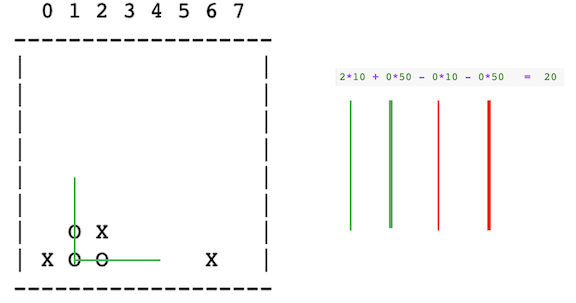


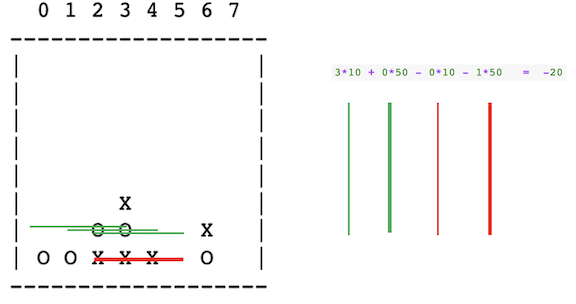

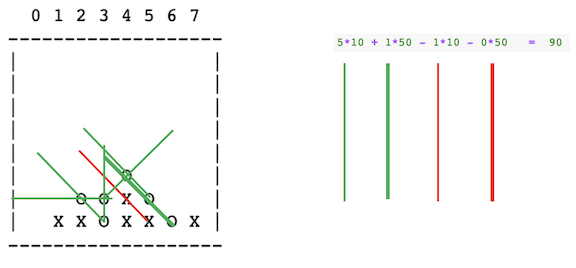

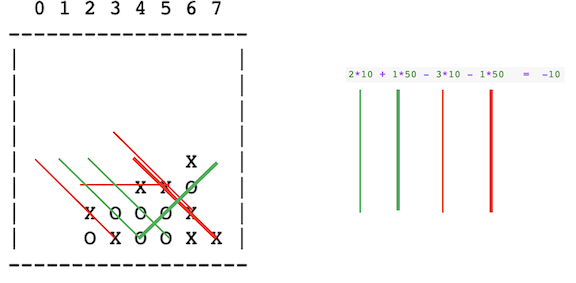

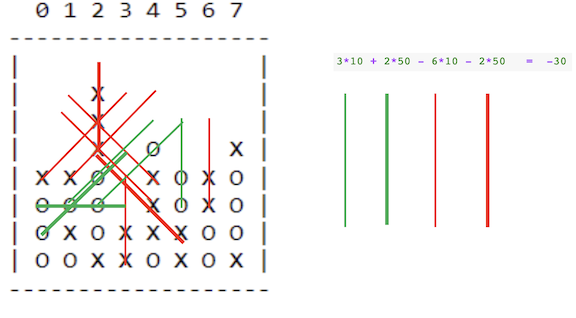

### Problem Two Part B

      0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |     X           |
     |     X           |
     |     X X O O O   |
     -------------------
    minMax: (9223372036854775807, 7)

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |     X           |
     |     X           |
     | O   X X O O     |
     -------------------
    minMax: (10, 2)

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |     X           |
     |     X           |
     | O   X X O O     |
     -------------------
    minMax: (-50, 2)

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |       X O       |
     | O     X X X     |
     -------------------
    minMax: (-9223372036854775807, 7)
    
    
### Problem Two Part C

This trace was performed with a vanilla-flavored minMax (nothing other than alpha-beta pruning),
with a maxDepth of 5.  


    X's move: 3

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X         |
     -------------------

    O's move: 7

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X       O |
     -------------------
    Number of nodes examined: 10000             
    Elapsed time: 13.9 secs.

    X's move: 4

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X X     O |
     -------------------

    O's move: 5

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X X O   O |
     -------------------
    Number of nodes examined: 9111
    Elapsed time: 12.5 secs.

    X's move: 4

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         X       |
     |       X X O   O |
     -------------------

    O's move: 4

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |         X       |
     |       X X O   O |
     -------------------
    Number of nodes examined: 9050
    Elapsed time: 12.53 secs.

    X's move: 2

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |         X       |
     |     X X X O   O |
     -------------------

    O's move: 1

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |         X       |
     |   O X X X O   O |
     -------------------
    Number of nodes examined: 2899
    Elapsed time: 4.01 secs.

    X's move: 3

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |       X X       |
     |   O X X X O   O |
     -------------------

    O's move: 5

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |         O       |
     |       X X O     |
     |   O X X X O   O |
     -------------------
    Number of nodes examined: 6609
    Elapsed time: 9.29 secs.

    X's move: 3

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |                 |
     |       X O       |
     |       X X O     |
     |   O X X X O   O |
     -------------------

    O's move: 3

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |       O         |
     |       X O       |
     |       X X O     |
     |   O X X X O   O |
     -------------------
    Number of nodes examined: 6912
    Elapsed time: 8.96 secs.

    X's move: 2

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |       O         |
     |       X O       |
     |     X X X O     |
     |   O X X X O   O |
     -------------------

    O's move: 6

       0 1 2 3 4 5 6 7
     -------------------
     |                 |
     |                 |
     |                 |
     |                 |
     |       O         |
     |       X O       |
     |     X X X O     |
     |   O X X X O O O |
     -------------------
    Number of nodes examined: 3953
    Elapsed time: 4.87 secs.

    Win for O!
    Bye!